# unzipping the dataset zip file

In [ ]:
!unzip '/content/drive/MyDrive/Legal Summarization/7152317.zip' -d '/content/legal_doc'

Archive:  /content/drive/MyDrive/Legal Summarization/7152317.zip
 extracting: /content/legal_doc/dataset.zip  
 extracting: /content/legal_doc/README.md  


In [ ]:
!unzip '/content/legal_doc/dataset.zip' # cleared the output cause it was 5000 rows long

### Let's do for Indian abstracts first
* First we will get the train judgement
* Then the train summaries
* Then we will get Test judgement
* Then the test summaries

#### Train Judgements

In [ ]:
import glob

In [ ]:
train_judgements_paths=sorted(glob.glob('/content/dataset/IN-Abs/train-data/judgement**/*.txt',recursive=True))

In [ ]:

train_judgements_paths[:5]

['/content/dataset/IN-Abs/train-data/judgement/1.txt',
 '/content/dataset/IN-Abs/train-data/judgement/10.txt',
 '/content/dataset/IN-Abs/train-data/judgement/100.txt',
 '/content/dataset/IN-Abs/train-data/judgement/1000.txt',
 '/content/dataset/IN-Abs/train-data/judgement/1001.txt']

In [ ]:
train_judgements=[]
for i in train_judgements_paths:
  with open(i,'r') as file:
    train_judgements.append(file.read())
    file.close()


In [ ]:
train_judgements[0]

'Appeal No. LXVI of 1949.\nAppeal from the High Court of judicature, Bombay, in a reference under section 66 of the Indian Income tax Act, 1022.\nK.M. Munshi (N. P. Nathvani, with him), for the appel lant. \' M.C. Setalvad, Attorney General for India (H. J. Umrigar, with him), for the respondent. 1950.\nMay 26.\nThe judgment of the Court was delivered by MEHR CHAND MAHAJAN J.\nThis is an appeal against a judgment of the High Court of Judicature at Bombay in an income tax matter and it raises the question whether munici pal property tax and urban immoveable property tax payable under the relevant Bombay Acts are allowable deductions under section 9 (1) (iv) of the Indian Income tax Act.\nThe assessee company is an investment company deriving its income from properties in the city of Bombay.\nFor the assessment year 1940 41 the net income of the assessee under the head "property" was computed by the Income tax Officer in the sum of Rs. 6,21,764 after deducting from gross rents certain pa

In [ ]:
len(train_judgements)

7030

### Train summaries

In [ ]:
train_summaries_paths=sorted(glob.glob('/content/dataset/IN-Abs/train-data/summary**/*.txt',recursive=True))

In [ ]:
train_summaries_paths[:5]

['/content/dataset/IN-Abs/train-data/summary/1.txt',
 '/content/dataset/IN-Abs/train-data/summary/10.txt',
 '/content/dataset/IN-Abs/train-data/summary/100.txt',
 '/content/dataset/IN-Abs/train-data/summary/1000.txt',
 '/content/dataset/IN-Abs/train-data/summary/1001.txt']

In [ ]:
train_summaries=[]
for i in train_summaries_paths:
  with open(i,'r') as file:
    train_summaries.append(file.read())
    file.close()

In [ ]:
train_summaries[0]

'The charge created in respect of municipal property tax by section 212 of the City of Bombay Municipal Act, 1888, is an "annual charge not being a capital charge" within the mean ing of section 9 (1) (iv) of the Indian Income tax Act, 199.2, and the amount of such charge should therefore be deducted in computing the income from such property for the purposes of section 9 of the Indian Income tax Act.\nThe charge in respect of urban immoveable property tax created by the Bombay Finance Act, 1939 is similar in character and the amount of such charge should also be deducted.\nThe expression "capital charge" in s.9(1) (iv) means a charge created for a capital sum,that is to say, a charge created to. \' secure the discharge of a liability of a capi tal nature; and an "annual charge" means a charge to secure an annual liabili ty. 554\n'

In [ ]:
len(train_summaries)

7030

#### Test judgements,Test summaries

In [ ]:
test_judgements_path=sorted(glob.glob('/content/dataset/IN-Abs/test-data/judgement**/*.txt',recursive=True))
test_summaries_path=sorted(glob.glob('/content/dataset/IN-Abs/test-data/summary**/*.txt',recursive=True))

In [ ]:
test_judgements_path[:5]

['/content/dataset/IN-Abs/test-data/judgement/1181.txt',
 '/content/dataset/IN-Abs/test-data/judgement/1195.txt',
 '/content/dataset/IN-Abs/test-data/judgement/1329.txt',
 '/content/dataset/IN-Abs/test-data/judgement/1378.txt',
 '/content/dataset/IN-Abs/test-data/judgement/1406.txt']

In [ ]:
test_summaries_path[:5]

['/content/dataset/IN-Abs/test-data/summary/1181.txt',
 '/content/dataset/IN-Abs/test-data/summary/1195.txt',
 '/content/dataset/IN-Abs/test-data/summary/1329.txt',
 '/content/dataset/IN-Abs/test-data/summary/1378.txt',
 '/content/dataset/IN-Abs/test-data/summary/1406.txt']

In [ ]:
test_judgements=[]
test_summaries=[]
for i,j in zip(test_judgements_path,test_summaries_path):
  with open(i,'r') as file:
    test_judgements.append(file.read())
    file.close()
  with open(j,'r') as file2:
    test_summaries.append(file2.read())
    file2.close()

len(test_judgements),len(test_summaries)

(100, 100)

### we will start by lowering the data stop words removal is generally not recommended in case of text summarization

In [ ]:
def lowering(text_list):
  lowered_text_list=[]
  for i in text_list:
    lowered_text_list.append(i.lower())
  return lowered_text_list

In [ ]:

train_judgements_lowered=lowering(train_judgements)
train_summaries_lowered=lowering(train_summaries)
test_judgements_lowered=lowering(test_judgements)
test_summaries_lowered=lowering(test_summaries)

In [ ]:
lengths=[]
for i in train_judgements:
  lengths.append(len(i.split(' ')))

In [ ]:
summary_lengths=[]
for i in train_summaries:
  summary_lengths.append(len(i.split(' ')))

### We can safely truncate the sequences to lenths of 5000
* preserves memory
* Prevents out of memory error for gpu while training

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Judgements Length Distribution')

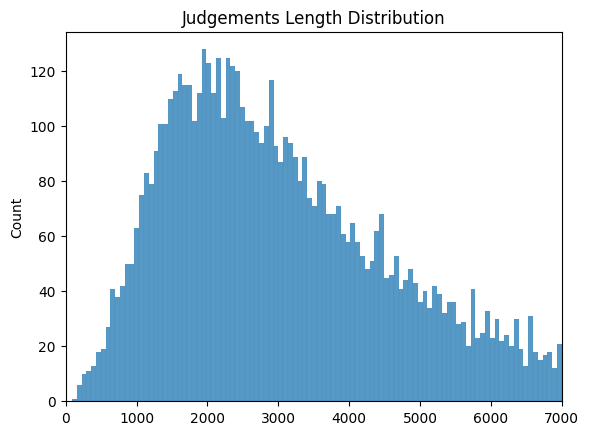

In [ ]:
hist=sns.histplot(lengths,bins=2000)
hist.set_xlim(0,7000)
hist.set_title('Judgements Length Distribution')

### 1000 will do the justice to the the summary lengths

Text(0.5, 1.0, 'Summaries Length Distribution')

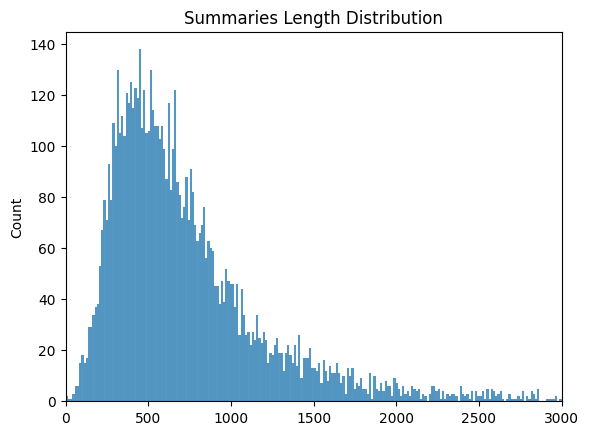

In [ ]:
hist=sns.histplot(summary_lengths,bins=2000)
hist.set_xlim(0,3000)
hist.set_title('Summaries Length Distribution')

### Time to convert out data into hugging face datasets format

In [ ]:
train_data={'judgements':train_judgements_lowered,
                     'summaries':train_summaries_lowered}

test_data={'judgements':test_judgements_lowered,
                     'summaries':test_summaries_lowered}

In [ ]:
! pip install transformers[setencepiece] sacrebleu rouge_score datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.5 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=23ee46655b2e51d9aed7e1fe96a76bfc6958350c34fcda5274f94a1377aa3a89
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
! pip install --upgrade accelerate
! pip uninstall -y transformers accelerate
! pip install transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 5.7 MB/s eta 0:00:00
Found existing installation: transformers 4.38.2
Uninstalling transformers-4.38.2:
  Successfully uninstalled transformers-4.38.2
Found existing installation: accelerate 0.27.2
Uninstalling accelerate-0.27.2:
  Successfully uninstalled accelerate-0.27.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 36.2 MB/s eta 0:00:00
  Using cached accelerate-0.27.2-py3-none-any.whl (279 kB)


In [ ]:
from datasets import Dataset

In [ ]:
train_legal_dataset=Dataset.from_dict(train_data)

In [ ]:
test_legal_dataset=Dataset.from_dict(test_data)

In [ ]:
train_legal_dataset

Dataset({
    features: ['judgements', 'summaries'],
    num_rows: 7030
})

In [ ]:
test_legal_dataset

Dataset({
    features: ['judgements', 'summaries'],
    num_rows: 100
})

### Downloading the model and tokenizer
* we are using Led `Long Former Encoder Decoder` model cause it supports larger input bandwidth not like capped on 1024 or 2048 like like Bert , Gpt and other models
* Google's T5 also support longer sequence lengths for the input but it's Memory hungry

In [ ]:
from transformers import LEDForConditionalGeneration, LEDTokenizer

model_name = "pszemraj/led-base-book-summary"
tokenizer = LEDTokenizer.from_pretrained(model_name)
model = LEDForConditionalGeneration.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/648M [00:00<?, ?B/s]

### Converting the text data into encoded data

In [ ]:
def example_into_features(example_dataset):
  input_encodings=tokenizer(example_dataset['judgements'],max_length=5000,truncation=True,padding=True) #Max length of 5000 above that is truncated
  output_encodings=tokenizer(example_dataset['summaries'],max_length=1000,truncation=True,padding=True) #Max length of 1000 above that is truncated

  return {'input_ids':input_encodings['input_ids'],
          'attention_mask':input_encodings['attention_mask'],
          'labels':output_encodings['input_ids']}

#max_length=1024,truncation=True

In [ ]:
train_mapped_data=train_legal_dataset.map(example_into_features,batched=True)

Map:   0%|          | 0/7030 [00:00<?, ? examples/s]

In [ ]:
test_mapped_data=test_legal_dataset.map(example_into_features,batched=True)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
train_mapped_data

Dataset({
    features: ['judgements', 'summaries', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 7030
})

In [ ]:
test_mapped_data

Dataset({
    features: ['judgements', 'summaries', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 100
})

In [ ]:
from transformers import TrainingArguments,DataCollatorForSeq2Seq,Trainer,pipeline

2024-03-06 19:35:20.119292: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 19:35:20.119389: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 19:35:20.293834: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
data_collator_seq2seq=DataCollatorForSeq2Seq(tokenizer=tokenizer,model=model)

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="legal_summarization",
    num_train_epochs=1,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    logging_dir="./logs",
    logging_steps=100,
    save_steps=1000,
    do_eval=True,evaluation_strategy='steps',eval_steps=100)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_mapped_data,
    eval_dataset=test_mapped_data,
    tokenizer=tokenizer,data_collator=data_collator_seq2seq)
trainer.train()

wandb: Currently logged in as: yugpratapsingh8. Use `wandb login --relogin` to force relogin


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss
100,2.692200,1.479054
200,1.437100,1.381580
300,1.288400,1.335349
400,1.346100,1.315189
500,1.304600,1.280001
600,1.258700,1.241763
700,1.264100,1.237072
800,1.222700,1.232558
900,1.168100,1.211168
1000,1.198000,1.191945


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 1024, 'min_length': 8, 'early_stopping': True, 'num_beams': 4, 'repetition_penalty': 3.5, 'length_penalty': 0.8, 'no_repeat_ngram_size': 3}
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning

TrainOutput(global_step=3515, training_loss=1.2005223229463884, metrics={'train_runtime': 8877.4074, 'train_samples_per_second': 0.792, 'train_steps_per_second': 0.396, 'total_flos': 2.37280499859456e+16, 'train_loss': 1.2005223229463884, 'epoch': 1.0})

In [ ]:
model.save_pretrained('/content/drive/MyDrive/Legal Summarization/summarization_model')
tokenizer.save_pretrained('/content/drive/MyDrive/Legal Summarization/summarization_tokenizer')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! unzip '/content/drive/MyDrive/Legal Summarization/Legal_model_tokenizer_directory.zip' -d '/content/Legal_model_tokenizer_directory'
! unzip '/content/drive/MyDrive/Legal Summarization/summarization_model.zip' -d '/content/summarization_model'
! unzip '/content/drive/MyDrive/Legal Summarization/Legal_summarization_model_v2.zip' -d '/content/Legal_model_v2_directory'
! unzip '/content/drive/MyDrive/Legal Summarization/Legal_summarization_tokenizer_v2.zip' -d '/content/Legal_model_tokenizer_v2_directory'

Archive:  /content/drive/MyDrive/Legal Summarization/Legal_model_tokenizer_directory.zip
  inflating: /content/Legal_model_tokenizer_directory/special_tokens_map.json  
  inflating: /content/Legal_model_tokenizer_directory/merges.txt  
  inflating: /content/Legal_model_tokenizer_directory/vocab.json  
  inflating: /content/Legal_model_tokenizer_directory/tokenizer_config.json  
Archive:  /content/drive/MyDrive/Legal Summarization/summarization_model.zip
  inflating: /content/summarization_model/model.safetensors  
  inflating: /content/summarization_model/generation_config.json  
  inflating: /content/summarization_model/config.json  
Archive:  /content/drive/MyDrive/Legal Summarization/Legal_summarization_model_v2.zip
  inflating: /content/Legal_model_v2_directory/generation_config.json  
  inflating: /content/Legal_model_v2_directory/model.safetensors  
  inflating: /content/Legal_model_v2_directory/config.json  
Archive:  /content/drive/MyDrive/Legal Summarization/Legal_summarizatio

### Conclusion First version of model works better

In [ ]:
from transformers import LEDForConditionalGeneration, LEDTokenizer,pipeline

### First version of the model

In [ ]:
locally_saved_model=LEDForConditionalGeneration.from_pretrained('/content/summarization_model')
locally_saved_tokenizer=tokenizer=LEDTokenizer.from_pretrained('/content/Legal_model_tokenizer_directory')

### Second version of the model

In [ ]:
locally_saved_model_v2=LEDForConditionalGeneration.from_pretrained('/content/Legal_model_v2_directory')
locally_saved_tokenizer_v2=tokenizer=LEDTokenizer.from_pretrained('/content/Legal_model_tokenizer_v2_directory')

In [ ]:
gen_kwargs={'length_penalty':1.0,'max_length':1500,'num_beams':8}
pipe1 = pipeline("summarization", model=locally_saved_model,tokenizer=locally_saved_tokenizer)
summary1=pipe1(test_judgements[2],**gen_kwargs)


Input ids are automatically padded from 3670 to 4096 to be a multiple of `config.attention_window`: 1024


In [ ]:
gen_kwargs = {"length_penalty": 1.0, "num_beams":8, "max_length":1500 }
pipe2 = pipeline("summarization", model=locally_saved_model_v2,tokenizer=locally_saved_tokenizer_v2,device=0)
summary2=pipe2(test_judgements[2],**gen_kwargs)

#### Second version of the model's summary

In [ ]:
print(summary2[0]['summary_text'])

in their return of turnover for the period from April 1, 1954 to March 31, 1955, they claimed exemption from sales tax in respect of sales of cotton of the total value of rs. 68,493 2 6 and sales of castor oil of the same value on the ground that these sales were oil contracts under which they continued to be the owners of the goods till the goods had crossed the customs barrier and thus entered the export stream, and so no tax was realisable on these sales in view of the provisions of article 286(1)(b) of the constitution.
the sales tax officer rejected this claim for exemption and assessed them to sales tax on a taxable turnover including these sales.
he also assesses them to purchase tax under section 10(b).
the notice of demand for the total sales tax and the purchase tax assessed was served on the sellers on September 30, 1956.
they thereupon moved the high court under article 226 of the constitu tion for the issue of appropriate writs for quashing the order of assessment and the 

#### First version of the model's summary

In [ ]:
print(summary1[0]['summary_text'])

the appellant firm was registered dealers under section 11 of the Bombay sales tax act.
in their return of turnover for the period from April 1, 1954 to March 31, 1955, they claimed exemption from sales tax in respect of sales of cotton of the total value of rs. 68,493 2 6 and sales of castor oil of the same value on the ground that these sales were oil contracts, under which they continued to be the owners of the goods till the goods had crossed the customs barrier and thus entered the export stream, and so no tax was realisable on these sales in view of the provisions of article 286(1)(b) of the constitution.
the sales tax officer rejected this claim for exemption and assessed them to sales tax on a taxable turnover including these sales.
he also assesses them to purchase tax under section 10(b).
the notice of demand for the total sales tax and the purchase tax assessed was served on the sellers on september 30, 1956.
they thereupon moved the high court under article 226 of the const

### Actual summary
The respondents firm claimed exemption from Sales Tax under article 286(i)(b) of the Constitution in respect of sales 925 made by them of cotton and castor oil on the ground that the sales were on F.O.B. contracts under which they continued to be the owners of the goods till those crossed the custom barrier and entered the export stream.\nThey also contested the purchase tax to which they were assessed under section 10(b) of the Bombay Sales Tax Act.\nThe High Court upheld the contention of the respondents regarding the Sales Tax but held that they were liable to pay purchase tax.\nOn appeal by both the parties Held, that the goods remained the seller \'s property till those had been brought and loaded on board the ship and so the sales were exempted from tax under article 286(i) of the Constitution.\nThe word " a person " in section 10(b) of the Bombay Sales Tax Act had been correctly interpreted as " a registered dealer " and the purchasing dealers had been rightly assessed to purchase tax.\nThe normal rule in F. 0.\nB. contracts was that the property was intended to pass and did pass on the shipment of the goods.\nThe presumption in F. 0.\nB. contracts was that it was the duty of the buyer to obtain the necessary export licence, though in the circumstances of a particular case that duty might fall on the seller.\nH.O. Brandt & Co. vs H. N. Morris & Co. Ltd., [1917] 2 K.B. 784 and M. W. Hardy & Co. vs A. V. Pound & Co., Ltd., (1953) 1.Q.B. 499, considered.\n"Export " under the Import and Export Control Act having been defined as " taking out of India by land, sea or air " it could not, under the Export Control Order, be held to have commenced till the ship carrying the goods left the port or in some cases passed the territorial waters.\nThe State of Bombay vs The United Motors (India) Ltd., (1953) 4 S.T.C. 133, held inapplicable.\n

### Let's see what is the performance difference of non fine tuned and our fine tuned model

In [ ]:
from transformers import LEDForConditionalGeneration, LEDTokenizer

model_name = "pszemraj/led-base-book-summary"
hugger_tokenizer = LEDTokenizer.from_pretrained(model_name)
hugger_model = LEDForConditionalGeneration.from_pretrained(model_name)

In [ ]:
gen_kwargs = {"length_penalty": 0.8, "num_beams":8, "max_length":500 }
pipe2 = pipeline("summarization", model=hugger_model,tokenizer=hugger_tokenizer)
summary_hugger=pipe2(test_judgements[2],**gen_kwargs)

### This is the result of Non Fine tuned Model

In [ ]:
summary_hugger

[{'summary_text': 'Daulatram Rameshwarlal, a firm registered under the Indian Partnership Act, is charged with selling oil FOB contracts. The sellers claim exemption from sales tax in respect of cotton and castor oil on the ground that these sales were oil-related contracts. They appeal to the Bombay High Court for quashing the order of assessment and prevent the sales tax officer from taking any steps regarding the sale of the goods. However, the Bombay Supreme Court has refused to hear their appeal. Civil Appeal No. 46, 1960. Both the appeals are dismissed.'}]

### Result of Fine Tuned Model

In [ ]:
print(summary1[0]['summary_text'])

the appellant firm was registered dealers under section 11 of the Bombay sales tax act.
in their return of turnover for the period from April 1, 1954 to March 31, 1955, they claimed exemption from sales tax in respect of sales of cotton of the total value of rs. 68,493 2 6 and sales of castor oil of the same value on the ground that these sales were oil contracts, under which they continued to be the owners of the goods till the goods had crossed the customs barrier and thus entered the export stream, and so no tax was realisable on these sales in view of the provisions of article 286(1)(b) of the constitution.
the sales tax officer rejected this claim for exemption and assessed them to sales tax on a taxable turnover including these sales.
he also assesses them to purchase tax under section 10(b).
the notice of demand for the total sales tax and the purchase tax assessed was served on the sellers on september 30, 1956.
they thereupon moved the high court under article 226 of the const

### Rouge score metric test on actual summary and test summary

In [ ]:
from rouge_score import rouge_scorer

### This is the actual summary that is true data

In [ ]:
print(test_summaries[20])

The Orissa Superior Judicial Service consisted of 15 posts.
10 of which were District and Sessions Judges or Additional District and Sessions Judges; of the other five, one was Registrar of the High Court and four were officers of the State Government.
P, one of the District and Sessions Judges was posted as Superintendent and Legal Remembrance in March 1962.
B. an Additional Judge.
was posted as Joint Secretary in the Law Department in the same month and sometime thereafter was posted as Superintendent and Legal Remembrance.
D, a District and Sessions judge was posted in January 1962 as member.
Sales Tax Tribunal, which was a non cadre post.
In February 1965 the High Court took a policy decision to the effect that as a general rule, judicial officers working in special posts.
whether cadre or non cadre.
outside their regular line, should be called to the regular line after the completion of three years in the interest of the service as well as the officers, so that the officers did no

### This is the summary generated by the model

In [ ]:
print(summary2[0]['summary_text'])

the Orissa Superior Judicial service (senior branch) is a combined cadre consisting of officers holding purely judicial posts as well as posts which are essentially administrative in character.
out of these, the district and sessions judges and additional district and session judges were discharging purely judicial functions.
in view of article 229 of the constitution, the power to appoint the registrar of the high court is exclusively that of the chief justice.
under the government of india act 1935, the powers to transfer a district judge from one post to another was that of governor though that power was always exercised in consultation with the high courts and by and large on the recommendation of the High court.
it appears that for some time past there were differences between the highcourt and the government about the posting of some of the judicial officers.
the high court was anxious that a judicial officer occupying one of the administrative posts enumerated above, should not,

In [ ]:
source_texts=test_judgements[2]
reference_summary=test_summaries[20]
generated_summary=summary2[0]['summary_text']

In [ ]:
scorer=rouge_scorer.RougeScorer(['rouge1','rouge2','rougeL'],use_stemmer=True)
rouge_scores=scorer.score(reference_summary,generated_summary)

### This is the score we are getting

In [ ]:
for metric,score in rouge_scores.items():
  print(f'{metric} : {score}')

rouge1 : Score(precision=0.6311377245508982, recall=0.6229314420803782, fmeasure=0.627007733491969)
rouge2 : Score(precision=0.28896882494004794, recall=0.285207100591716, fmeasure=0.2870756402620607)
rougeL : Score(precision=0.28263473053892213, recall=0.2789598108747045, fmeasure=0.280785246876859)


### Extracting the templates and static

In [ ]:
! unzip '/content/drive/MyDrive/Legal Summarization/templates.zip' -d '/content/templates'
! unzip '/content/drive/MyDrive/Legal Summarization/static.zip' -d '/content/static'

Archive:  /content/drive/MyDrive/Legal Summarization/templates.zip
   creating: /content/templates/.ipynb_checkpoints/
  inflating: /content/templates/index.html  
  inflating: /content/templates/results.html  
Archive:  /content/drive/MyDrive/Legal Summarization/static.zip
   creating: /content/static/.ipynb_checkpoints/
   creating: /content/static/css/
  inflating: /content/static/top-view-frame-with-contract-wooden-judge-gavel.jpg  
   creating: /content/static/css/.ipynb_checkpoints/
  inflating: /content/static/css/main.css  
  inflating: /content/static/css/style.css  


In [ ]:
!pip install pyngrok

### We are actually using the first version of the model because it gives more all rounded summaries that have more better grammatical design

In [ ]:
from transformers import LEDForConditionalGeneration, LEDTokenizer,pipeline

! unzip '/content/drive/MyDrive/Legal Summarization/Legal_model_tokenizer_directory.zip' -d '/content/Legal_model_tokenizer_directory'
! unzip '/content/drive/MyDrive/Legal Summarization/summarization_model.zip' -d '/content/summarization_model'


locally_saved_model=LEDForConditionalGeneration.from_pretrained('/content/summarization_model')
locally_saved_tokenizer=tokenizer=LEDTokenizer.from_pretrained('/content/Legal_model_tokenizer_directory')

### Here is our web application interface for hassle free summarization

In [ ]:
from pyngrok import ngrok

In [ ]:
from flask import Flask,request,render_template
import nltk

In [ ]:
app=Flask(__name__)
port_no = 5000
ngrok.set_auth_token('2dW7qeQXYf1RbmtHWu1mUriKQnC_6qjCtetiLtbfKXVY6R1ZZ')
public_url = ngrok.connect(port_no).public_url

@app.route('/')
def homepage():
  return render_template('index.html')

@app.route('/summary_generation',methods=['POST','GET'])
def main_function():
  output=''
  input_article=''
  if request.method=='POST':
    try:
      pipe1 = pipeline("summarization", model=locally_saved_model,tokenizer=locally_saved_tokenizer,device=0)

      length_parameter=int(request.form.get('length_of_summary_required'))
      input_article=request.form.get('main_article')
      gen_kwargs={'length_penalty':1.0,'max_length':length_parameter,'num_beams':16}
      output_summary=pipe1(input_article,**gen_kwargs)
      output=output_summary[0]['summary_text']

    except Exception as e:
      output=e

  return render_template('results.html',original_text=input_article, summary=output)

print(f'here is your global link {public_url}')

if __name__=='__main__':
  app.run(port=port_no)







here is your global link https://3adc-34-125-139-6.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [29/May/2024 21:13:01] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/May/2024 21:13:01] "GET /static/top-view-frame-with-contract-wooden-judge-gavel.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/May/2024 21:13:08] "GET /favicon.ico HTTP/1.1" 404 -
Input ids are automatically padded from 6027 to 6144 to be a multiple of `config.attention_window`: 1024
INFO:werkzeug:127.0.0.1 - - [29/May/2024 21:13:55] "POST /summary_generation HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/May/2024 21:13:55] "GET /static/top-view-frame-with-contract-wooden-judge-gavel.jpg HTTP/1.1" 304 -


### we can try few test judgements from here

In [ ]:
test_judgements[8]

'Appeals Nos. 884 887 of 1962.\nAppeals from the judgment and decree dated May 2, 1960, of the Rajasthan High Court in Civil Second Appeal Nos.\n268 of 1954, 203 of 1955, 4 of 1954 and 27 of 1954.\nsection K. Kapur and B. R. G. K. Achar, for the appellant \'in allthe appeals).\nR. P. Modi and R. K. Garg, for the respondents (in C.A. No. 887/1962).\nMarch 12, 1964.\nThe Judgment of the Court was delivered by WANCHOO, J.\nThese four appeals arise out of four certi ficates granted by the High Court of Rajasthan and raise a common question.\nWe therefore, propose to set out facts in one of the present appeals (No. 887), as the facts in other appeals are similar, except that the commodity involved was different and so was the amount in dispute.\nThe suit out \'of which appeal No. 887 has arisen was filed by the respondent against the State of Rajasthan.\nThe respondent was a resident of the former Dholpur State and the dispute which led to the suit related to a time before the merger of for